In [1]:
import matplotlib.pyplot  as plt
import cv2 as cv
import numpy as np

In [2]:
img = cv.imread('test2.png',cv.IMREAD_GRAYSCALE)
#一个小检查
if img.data == None:
    print("No such file")

In [7]:
def cv_show(name,img):
    cv.imshow(name,img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [8]:
cv_show("Image",img)

In [10]:
img.shape

(512, 512)

In [15]:
# Draw a plot in a given image drawing context
# @param[in, out] image image drawing context
# @param[in] data_array data to draw
# @param[in] color color to use when drawing
# @param[in] max_val scale factor for the histogram values (default is 1)
def DrawGraph(image, data_array, color, max_val = 1.0):
  image_w = image.shape[1];
  image_h = image.shape[0];
  data_size = data_array.shape[0];

  step = image_w / data_size;

  for i in range(1, data_size):
    cv.line(image, 
            (round(step * (i - 1)),
            image_h - int(image_h * data_array[i - 1] / max_val)),
            (round(step * i),
            image_h - int(image_h * data_array[i] / max_val)),
            color, thickness = 1)

# Draw a histogram in a given image drawing context
# @param[in, out] image image drawing context
# @param[in] data_array data to draw
# @param[in] color color to use when drawing
# @param[in] max_val scale factor for the histogram values (default is 1)
def DrawHist(image, data_array, color, max_val = 1.0):
  image_w = image.shape[1];
  image_h = image.shape[0];
  data_size = data_array.shape[0];

  step = image_w / data_size;

  for i in range(1, data_size):
    cv.rectangle(image, 
                 (round(step * (i - 1)), 
                  image_h - int(image_h * data_array[i - 1] / max_val)),
                 (round(step * i),
                  image_h),
                 color,
                 thickness = -1)

# Export a matrix into a file
# @param[out] fn file name
# @param[in] mat matrix to export
# @param[in] delimiter delimiter between columns
def ExportText(fn, mat, delimiter = '\t'):
  if mat.ndim > 2:
    mat_out = mat.reshape(mat.shape[0], -1)
  else:
    mat_out = mat
  if mat.dtype == np.uint8:
    format = "%i"
  else:
    format = "%f"
  np.savetxt(fn, mat_out, fmt = format, delimiter = delimiter)

In [11]:
#Calculate histogram
hist = cv.calcHist([img],[0],None,[256],[0,256])
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]

In [16]:
#show histogram
hist_img = np.full((256,512,3),255,dtype = np.uint8)
DrawHist(hist_img,cum_hist,(127,127,127),hist.max())
DrawGraph(hist_img,cum_hist,(0,0,0),1)

cv_show("Histogram",hist_img)

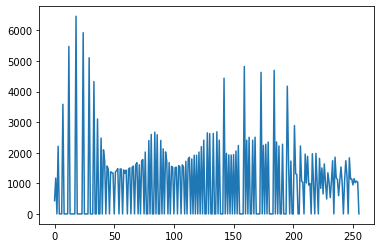

In [18]:
#Use Lut
lut = (255*cum_hist).clip(0,255).astype(np.uint8)

#Apply Lut
img_lut = cv.LUT(img,lut)
cv_show('Image after the LUT',img_lut)

#Calculate histogram after LUT
hist = cv.calcHist([img_lut],[0],None,[256],[0,256])
plt.plot(hist)

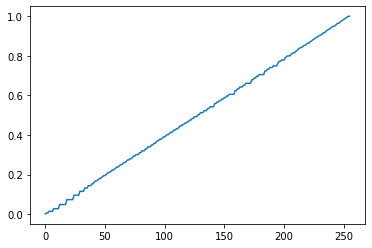

In [21]:
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]
plt.plot(cum_hist)

In [28]:
hist_img = np.full((256,512,3),255,dtype = np.int8)
DrawHist(hist_img,hist,(127,127,127),hist.max())
DrawGraph(hist_img,cum_hist,(0,0,0),1)
cv_show('lut plot',hist_img)